# 1. EDA(Exploratory Data Analysis)

- 주최측으로부터 주어진 데이터에 대한 탐색을 진행할 예정이다.
- 크게 3가지의 데이터가 주어져있는데, 기본적인 데이터의 type 파악, missing value 및 unique value 파악, 각 column의 예시를 통한 feature의 성격 유추 등을 기본적으로 모두 진행한다.
- 이후 추천을 할 때 유용하게 사용할 수 있을 법한 feature들은 더욱 자세하게 살펴보고, 해당 소문단의 마지막에 활용할 수 있을지 없을지 여부와 어떻게 활용하면 좋을 지에 대한 결론을 ***Italic Bold***체로 적어놓았다.

<hr>

# Index
## 0. library load 및 data load, missing & unique value 추출 함수 정의
## 1. Articles.csv
    - 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)
    - Columns('Product_type', 'Section', 'Department') 분포 확인
    
## 2. Customers.csv
    - 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)
    - 연령대별 분포 확인
    - Postal_code
    
## 3. Transactions_train.csv
    - 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)
    - Article의 판매횟수별 분포 및 고객들의 구매횟수별 분포
    - Sales_channel (on-line or off-line)
    - 날짜별 분포
    - 계절성
    - Peak day
<hr>

## 0. Intro(library load 및 data load)
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

In [3]:
# Missing value 갯수 및 비율 확인, 각 데이터마다 적용 예정
def missing_data(dataframe):
    total_miss = dataframe.isnull().sum().sort_values(ascending = False)
    percent_miss = round(((dataframe.isnull().sum()/dataframe.shape[0])*100), 4).sort_values(ascending = False)
    return pd.concat([total_miss, percent_miss], axis = 1, keys = ['Total miss', 'Percent miss(%)'])

In [4]:
# Column마다 unique value 갯수 및 비율 확인, 각 데이터마다 적용 예정
def unique_features(dataframe):
    num_unique = dataframe.nunique()
    percent_unique = (num_unique/dataframe.shape[0])*100
    return pd.concat([num_unique, percent_unique], axis = 1,\
                     keys = ['Unique feature num', 'Unique feature ratio(%)'])\
                     .sort_values(by = ['Unique feature num'])

## 1. Articles.csv
    - 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)
    - Columns('Product_type', 'Section', 'Department') 분포 확인
<hr>

### 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)

In [5]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

- 11 int64 columns, and 14 object columns

In [6]:
missing_data(articles)

,Total miss,Percent miss(%)
detail_desc,416,0.3942
perceived_colour_master_name,0,0.0000
garment_group_name,0,0.0000
garment_group_no,0,0.0000
section_name,0,0.0000
section_no,0,0.0000
index_group_name,0,0.0000
index_group_no,0,0.0000
index_name,0,0.0000
index_code,0,0.0000


- <code>'detail_desc'</code>(detail description) column에 missing value가 존재한다. 하지만 어차피 article에 대한 설명이고, 이는 다른 메타 데이터에 잘 녹아 들어가 있으므로 사용하지 않을 계획이라 무시한다.

In [7]:
unique_features(articles)

,Unique feature num,Unique feature ratio(%)
index_group_no,5,0.004737
index_group_name,5,0.004737
perceived_colour_value_id,8,0.007580
perceived_colour_value_name,8,0.007580
index_name,10,0.009475
index_code,10,0.009475
product_group_name,19,0.018002
perceived_colour_master_name,20,0.018950
perceived_colour_master_id,20,0.018950
garment_group_name,21,0.019897


- 당연하지만 article_id는 모두 unique하다

In [8]:
pd.set_option('display.max_columns', None)
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


- 각 column이 어떤 내용을 나타내는지 competition에 설명이 전혀 없어 대략적으로 추측해보았다.
- <code>'article_id'</code>: article별 고유 id
- <code>'product_code'</code>, <code>'prod_name'</code>: 상품코드와 이름(색만 다른 같은 상품은 code 중복)
    - E.g.) Strap top, T-shirt etc.
- <code>'product_type_no'</code>, <code>'product_type_name'</code>: 상품의 유형
    - E.g.) Vest top, Bra etc.
- <code>'product_group_name'</code>: 상품이 속한 group
    - E.g.) Garment Upper body, Underwear etc.    
- <code>'graphical_appearance_no'</code>, <code>'graphical_appearance_name'</code>: 상품의 외양 및 코드
    - E.g.) Stripe, Solid etc.
- <code>'colour_group_code'</code>, <code>'colour_group_name'</code>: 색깔 그룹과 코드
    - E.g.) Black, Off White etc.
- <code>'perceived_colour_value_id'</code>, <code>'perceived_colour_value_name'</code>, <code>'perceived_colour_master_id'</code>, <code>'perceived_colour_master_name'</code>: 색에 대한 추가정보
    - E.g.) Dark, Light / Black, White etc.
- <code>'department_no'</code>, <code>'department_name'</code>: 기획 상품 느낌
    - E.g.) Jersey Basic, Clean Lingerie etc.
- <code>'index_code'</code>, <code>'index_name'</code>: 성별 및 착용 부위에 따른 분류
    - E.g.) Ladieswear, Lingeries/Tights etc.
- <code>'index_group_no'</code>, <code>'index_group_name'</code>: Index가 속한 group
    - E.g.) Ladieswear etc.
- <code>'section_no'</code>, <code>'section_name'</code>: 상품이 속한 section
    - E.g.) Womens Everyday Basics, Womens Lingerie etc.
- <code>'garment_group_no'</code>, <code>'garment_group_name'</code>: 상품의 용도
    - E.g.) Jersey Basic, Under-, Nightwear etc.
- <code>'detail_desc'</code>: 각 상품에 대한 자세한 설명(하지만 이미 다른 데이터에 포함된 내용이라 사용은 하지 않을 예정)
- code와 그에 따른 name이 같이 포함되어 있는데, 향후 labeling하여 사용할 땐 code만 사용하여 중복되는 내용을 배제함으로써 저장 공간 낭비를 피할 것이다.

### Columns('Product_type', 'Section', 'Department') 분포 확인

- 위에 나열한 바와 같이 정말 다양한 column들이 포함되어 있는데, ```unique features()```를 통해 알아낸 사실에 의거하여, unique한 값들이 가장 많은(cardinality가 가장 높은) 세가지 column인 ```section_name```, ```product_type_name```, ```department_name``` 등을 아래에서 각각 분포를 시각화해볼 것이다.

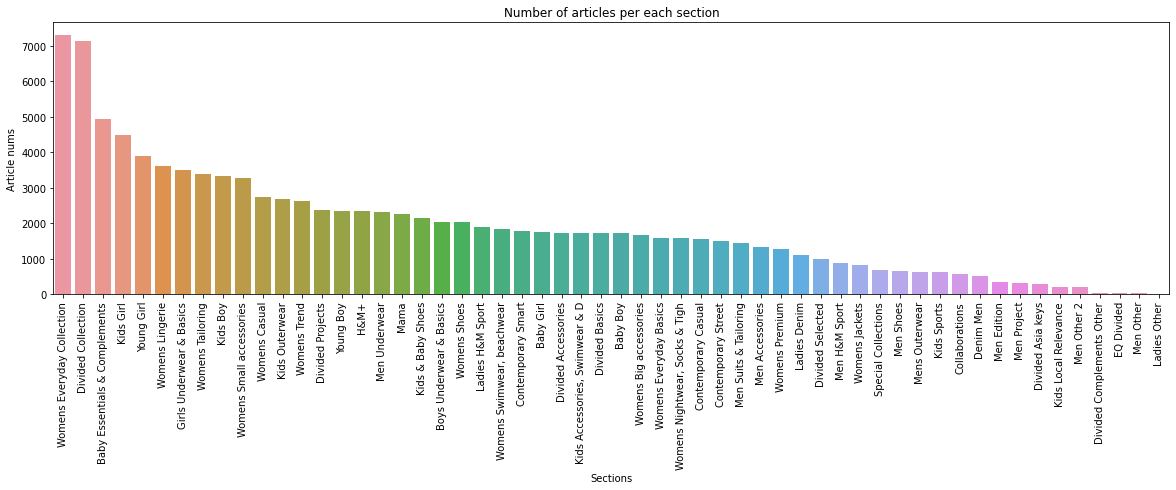

In [9]:
section_name = articles.groupby(["section_name"])["article_id"].nunique()
section_name_df = pd.DataFrame({'Sections': section_name.index,
                   'Article nums': section_name.values})
section_name_df = section_name_df.sort_values(['Article nums'], ascending=False)

plt.figure(figsize = (20, 5))
plt.title('Number of articles per each section')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Sections', y="Article nums", data=section_name_df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

- article의 숫자가 많은 section의 이름 중 woman이나 girl이 포함된 항목이 많으므로 H&M은 좀 더 여성복을 중심으로 내는 fashion 브랜드임을 알 수 있다.

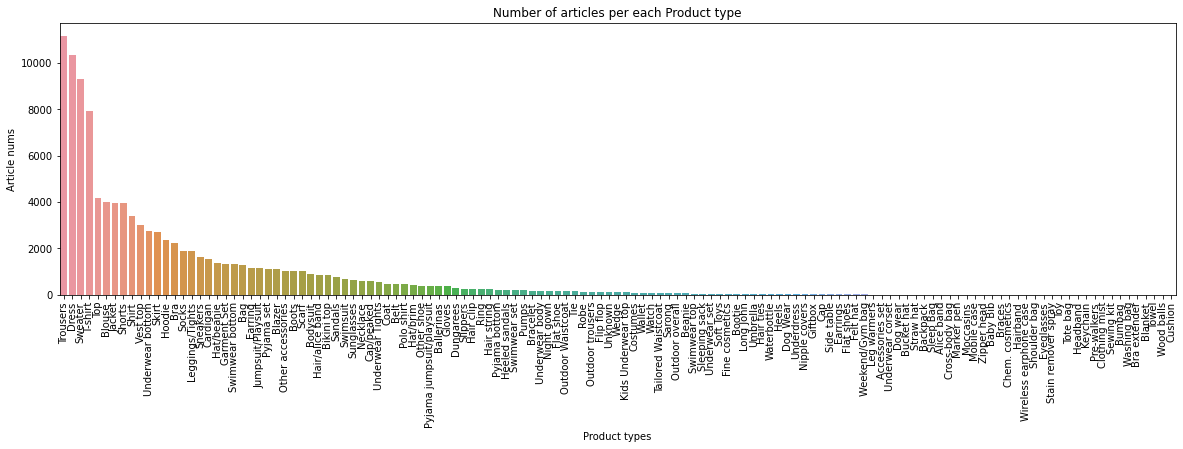

In [10]:
product_type_name = articles.groupby(["product_type_name"])["article_id"].nunique()
product_type_df = pd.DataFrame({'Product types': product_type_name.index,
                   'Article nums': product_type_name.values})
product_type_df = product_type_df.sort_values(['Article nums'], ascending=False)

plt.figure(figsize = (20, 5))
plt.title('Number of articles per each Product type')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product types', y="Article nums", data=product_type_df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

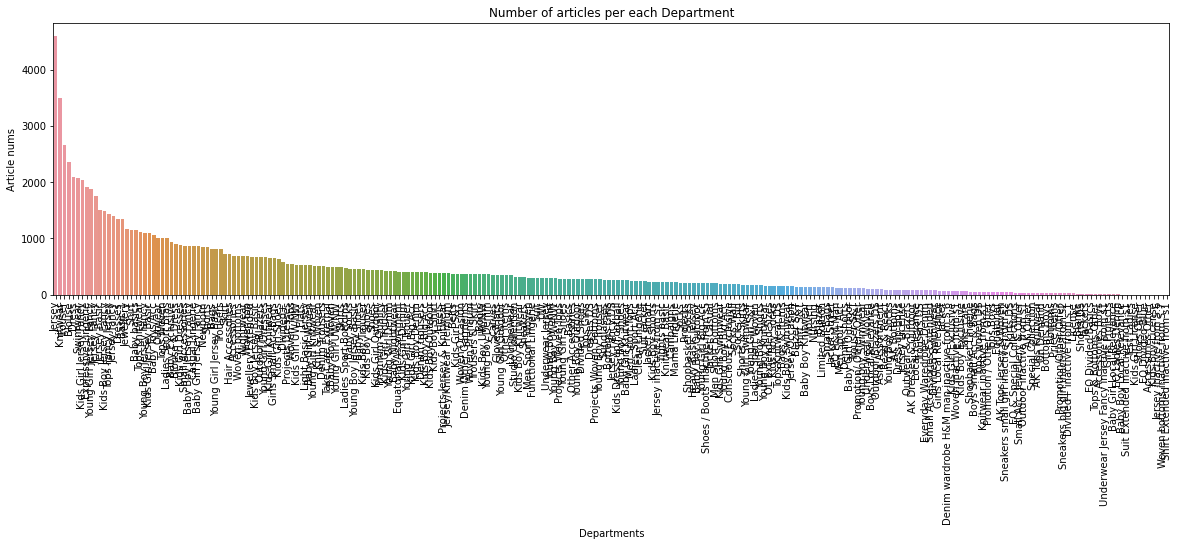

In [11]:
department_name = articles.groupby(["department_name"])["article_id"].nunique()
department_name_df = pd.DataFrame({'Departments': department_name.index,
                   'Article nums': department_name.values})
department_name_df = department_name_df.sort_values(['Article nums'], ascending=False)

plt.figure(figsize = (20, 5))
plt.title('Number of articles per each Department')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Departments', y="Article nums", data=department_name_df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

- ```Departments```와 ```Section```은 비교적 고르게 분포해 있고, ```Product_types```가 가장 양극화가 심하다. 
- ***해당 feature들은 cardinality가 높으면서도 전체적으로 비교적 고르게 분포하고 있어, article의 특징을 구분해내고 고객의 취향을 판별하기에 적합하다. 하여 추천을 할 때 유용하게 사용해볼 예정이다.***

## 2. Customers.csv
    - 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)
    - 연령대별 분포 확인
    - Postal_code
<hr>

### 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [13]:
missing_data(customers)

,Total miss,Percent miss(%)
Active,907576,66.1508
FN,895050,65.2378
fashion_news_frequency,16009,1.1669
age,15861,1.1561
club_member_status,6062,0.4418
customer_id,0,0.0000
postal_code,0,0.0000


In [14]:
unique_features(customers)

,Unique feature num,Unique feature ratio(%)
FN,1,0.000073
Active,1,0.000073
club_member_status,3,0.000219
fashion_news_frequency,4,0.000292
age,84,0.006123
postal_code,352899,25.721876
customer_id,1371980,100.000000


In [15]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [16]:
# 각 column마다 unique value들을 모두 출력해본 것.(postal_code, customer_id 제외)
for col in customers.nunique().sort_values().index[:-2]:
    if col == 'age':
        print(col, ':', np.sort(customers[col].unique()))
        continue
    print(col, ':', customers[col].unique())

FN : [nan  1.]
Active : [nan  1.]
club_member_status : ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']
fashion_news_frequency : ['NONE' 'Regularly' nan 'Monthly' 'None']
age : [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.
 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.
 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69.
 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87.
 88. 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


- ```customer_id```: primary key
- ```FN```: [nan, 1], 어떤 걸 나타내는 column인지는 모르겠지만 결측치가 Active와 비슷한 걸로 보아 user의 이탈율을 체크하는 column같다.
- ```Active```: [nan, 1], 이름처럼 활성 user를 나타내는 것 같다.
    - FN과 Active의 결측치인 NaN은 일반적으로 결측치가 의미하는 값의 부재가 아니라, 1 or 0의 binary값 중 0을 나타낸다.
- ```Club member status```: [nan, Pre-create, Active, Left Club], H&M 멤버쉽 유지 여부
- ```Fashion news frequency```: [nan, None, Monthly, Regularly], H&M에서 제공하는 fashion에 대한 news를 받아보는지 여부
- ```Age```: [nan, 16 ~ 99], 고객들의 나이
- ```Postal_code```: hash가 적용된 위치 정보

### 연령대별 분포 확인
- 연령대별로 선호하는 fashion item이 다양한 것은 자명한 사실이므로 상품을 추천하는 데에 있어 고객의 나이는 반드시 고려해야 할 중요한 요소이다. 그렇기에 연령별 고객 수의 분포를 나타내보는 것은 필수적인 과정이다.

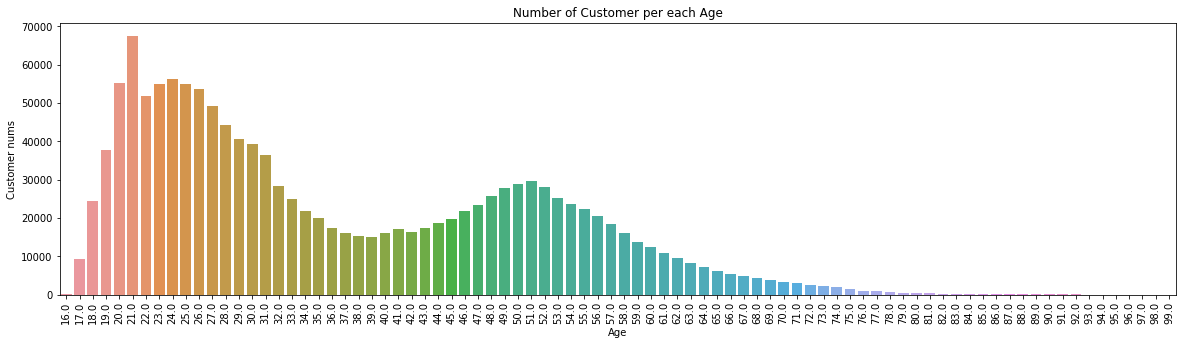

In [45]:
age = customers.groupby(["age"])["customer_id"].nunique()
age_df = pd.DataFrame({'Age': age.index,
                   'Customer nums': age.values})

plt.figure(figsize = (20, 5))
plt.title('Number of Customer per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customer nums", data=age_df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

- 연령대별 고객수의 분포는 쌍봉낙타같은 형태를 보인다. 10대 후반과 20대에 눈에 띄게 많은 고객이 있으며(약 44%) 21살이 가장 많은 고객수를 기록하는 연령이다. 이후 30대 후반 ~ 40대 초반까지 회원수가 계속 감소하다가, 50대 초반까지 다시 회원수가 증가한다. 그 다음으로는 연령대가 높아질수록 단조감소하는 형태를 띈다.
- 10\~20, 30\~40대의 특정 연령만 타겟팅하는 일부 브랜드들과는 달리, H&M은 전연령대에 걸쳐 비교적 넓은 나이대의 고객들이 존재함을 알 수 있다.
- ***따라서 각 연령대별로 일정 명수 이상의 고객들이 존재하므로, 고객들의 나이대에 따라 동년배의 다른 고객들의 구매기록을 참고하여 추천을 하는 데에 유용하게 사용할 수 있을 것 같다.***

### Postal code

In [19]:
# 같은 Postal code로 등록된 고객들의 수를 내림차순으로 출력 
postal_group = customers.groupby(['postal_code'])['customer_id'].nunique()
postal_group_df = pd.DataFrame({'Postal code': postal_group.index,
                   'Customer num': postal_group.values})
postal_group_df = postal_group_df[postal_group_df['Customer num']>4].sort_values(['Customer num'], ascending=False)

In [20]:
postal_group_df.head(10)

,Postal code,Customer num
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156
43384,1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99...,154
216964,9d5787501bf1c77592156ba51eab13f4a2670c80768643...,141
222800,a1959a16bf167858c93a66ec2a330644512b25fb10f97e...,138
11690,087a46b65170845b4a55226ff1eb748ce7843d4b637cbe...,134
106374,4d22901a97bd952bb92cdd31b38c39b41dd3250a735cab...,132


- 회원이 120,303명이나 되는 주소는 아마도 주소지를 입력하지 않은 사람들이거나, '서울특별시' 이런 식으로 매우 간단하게 주소지를 적은 사람들로 추측된다. 그 외에 수십 ~ 수백 명의 고객들이 같은 주소를 적은 건 아마도 공동주택의 주소일 것 같다. 이렇게 
- 다만 암호화된 주소이기에, 비슷한 지역으로 clustering도 할 수 없어 딱히 사용할 방법은 없는 것 같다.
- ***따라서 Postal code는 사용하지 않을 것이다.***

## 3. Transactions_train.csv
    - 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)
    - Article의 판매횟수별 분포 및 고객들의 구매횟수별 분포
    - Sales_channel (on-line or off-line)
    - 날짜별 분포
    - 계절성
    - Peak day
<hr>

### 기본 데이터 확인(Data type, Missing value, Unique value, column 설명)

In [21]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [22]:
missing_data(transactions)

,Total miss,Percent miss(%)
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


In [23]:
unique_features(transactions)

,Unique feature num,Unique feature ratio(%)
sales_channel_id,2,0.000006
t_dat,734,0.002309
price,9857,0.031008
article_id,104547,0.328885
customer_id,1362281,4.285476


In [24]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


- transactions 데이터는 판매 log에 대한 데이터이다.
- <code>'t_dat'</code>: 판매 날짜
- <code>'customer_id'</code>: 구매한 고객의 id
- <code>'article_id'</code>: 판매된 article의 id
- <code>'price'</code>: 가격(scaling된 값인데, constant로 나누어졌는지, normalized된 건지 밝힐 수 없다고 함, from H&M)
- <code>'sales_channel_id'</code>: 판매된 channel(1: 오프라인, 2: 온라인, from H&M)

### Article의 판매횟수별 분포 및 고객들의 구매횟수별 분포

In [3]:
Sold_articles = transactions['article_id'].value_counts()
Bought_customers = transactions['customer_id'].value_counts()

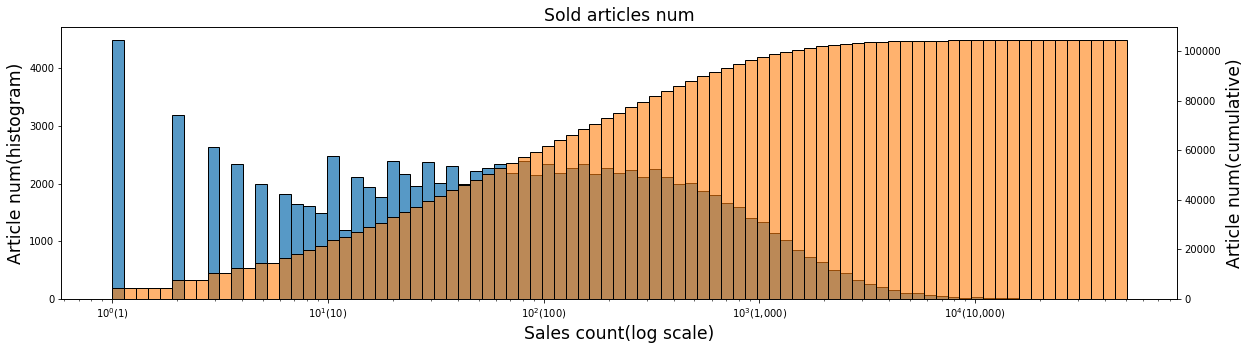

In [26]:
fig, ax1 = plt.subplots(figsize = (20, 5))
font = {'size': 'xx-large'}
ax1.set_xlabel('Sales count(log scale)', fontdict=font)
ax1.set_ylabel('Article num(histogram)', fontdict=font)
sns.histplot(Sold_articles, log_scale=True)

ax2 = ax1.twinx()
ax2.set_ylabel('Article num(cumulative)', fontdict=font)
sns.histplot(Sold_articles, log_scale=True, cumulative=True, color=sns.color_palette('tab10')[1], alpha=0.6)

plt.title('Sold articles num', fontdict=font)
plt.xticks(np.logspace(0, 4, num = 5), labels = [r'$10^0$(1)', r'$10^1$(10)', r'$10^2$(100)', r'$10^3$(1,000)',\
                                                 r'$10^4$(10,000)'])
plt.show()

In [27]:
print('데이터 집계기간 중 판매된 article의 종류 가짓수:', Sold_articles.shape[0],
      '\n데이터 집계기간 중 1,000회 이상 판매된 article 수:', Sold_articles[Sold_articles>1000].shape[0],
      '\n데이터 집계기간 중 10,000회 이상 판매된 article 수:', Sold_articles[Sold_articles>10000].shape[0])
print('최소 판매량:', min(Sold_articles),'최다 판매량:', max(Sold_articles))

데이터 집계기간 중 판매된 article의 종류 가짓수: 104547 
데이터 집계기간 중 1,000회 이상 판매된 article 수: 7804 
데이터 집계기간 중 10,000회 이상 판매된 article 수: 86
최소 판매량: 1 최다 판매량: 50287


- 위의 그래프는 각 article을 판매횟수별로 histogram(파란 막대)과 이에 대한 누적 분포(주황 막대)로 나타낸 것이다.(x축: 판매 횟수(log-scale), y축: 판매횟수에 해당되는 article의 수, E.g.) 가장 왼쪽에 우뚝 솟은 파란 막대는 판매횟수가 1인 article들의 갯수이다.) 
- 판매횟수가 1회인 article이 가장 많으며, 10회에서 100회, 그리고 1,000회까지 판매횟수 별 article의 수는 나름 고른 편이다. 다만 판매 횟수 1,000회 이상부터는 article의 수가 급격히 줄어든다. 총 104,547개의 article 중 1,000회 이상 팔린 article은 7,804개(약 7%)이고, 10,000회 이상 팔린 article은 86개(0.08%)이다. 즉, 1,000회 미만의 판매량을 가진 article이 전체의 93%이므로 H&M은 다품종 소량생산을 추구한다고 추측해볼 수 있다. H&M은 유행에 맞춰 발빠르게 다양한 상품들을 출시하는 fast fashion 브랜드이므로 당연한 분포라고 볼 수 있다. 

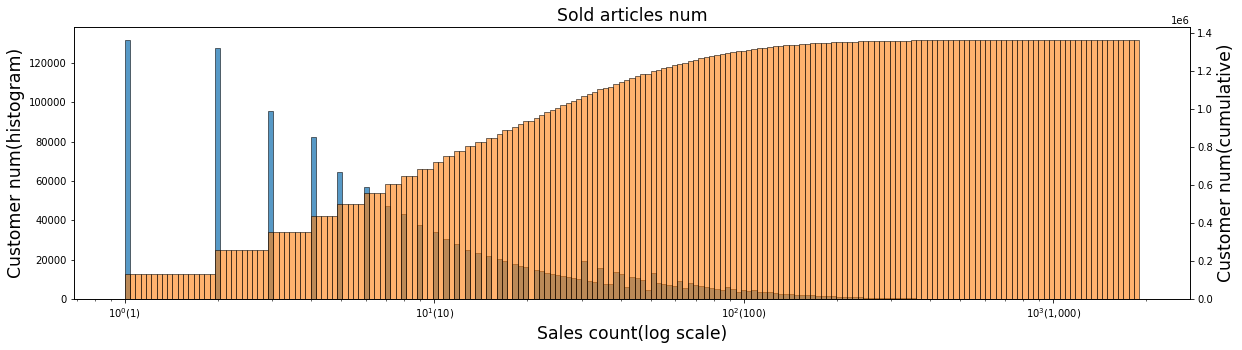

In [28]:
fig, ax1 = plt.subplots(figsize = (20, 5))
font = {'size': 'xx-large'}
ax1.set_xlabel('Sales count(log scale)', fontdict=font)
ax1.set_ylabel('Customer num(histogram)', fontdict=font)
sns.histplot(Bought_customers, log_scale=True)

ax2 = ax1.twinx()
ax2.set_ylabel('Customer num(cumulative)', fontdict=font)
sns.histplot(Bought_customers, cumulative=True, color=sns.color_palette('tab10')[1], alpha=0.6)

plt.title('Sold articles num', fontdict=font)
plt.xticks(np.logspace(0, 3, num = 4), labels = [r'$10^0$(1)', r'$10^1$(10)', r'$10^2$(100)', r'$10^3$(1,000)'])
plt.show()

In [29]:
print('데이터 집계기간 중 구매경험이 있는 고객들의 수:', Bought_customers.shape[0],
      '\n데이터 집계기간 중 100회 이상 구매한 고객들의 수:', Bought_customers[Bought_customers>100].shape[0],
      '\n데이터 집계기간 중 1,000회 이상 구매한 고객들의 수:', Bought_customers[Bought_customers>1000].shape[0])
print('최소 구매량:', min(Bought_customers), '최대 구매량:', max(Bought_customers))

데이터 집계기간 중 구매경험이 있는 고객들의 수: 1362281 
데이터 집계기간 중 100회 이상 구매한 고객들의 수: 56116 
데이터 집계기간 중 1,000회 이상 구매한 고객들의 수: 20
최소 구매량: 1 최대 구매량: 1895


- 위의 그래프는 각 고객들을 구매횟수별로 histogram(파란 막대)과 이에 대한 누적 분포(주황 막대)로 나타낸 것이다.(x축: 구매 횟수(log-scale), y축: 구매횟수에 해당되는 고객들의 수, E.g.) 가장 왼쪽에 우뚝 솟은 파란 막대는 구매횟수가 1인 고객들의 명수이다.) 
- 데이터가 제시된 기간동안(약 2년) 총 1,362,281명의 Customer가 구매를 1번 이상 진행하였다. 그 중 100번 이상 구매를 한 고객은 56,116(약 4.11%)명이며 1,000번 이상 구매를 한 고객은 20(0.001%)명이다. 최대 1895번 구매를 한 고객도 있었다.
- ***training데이터에 집계된 기간동안 3회 이하로 구매한 고객들은 전체의 25%정도이다. 1회만 구매했던 고객은 전체의 약 10%정도이다. 즉, 구매기록이 얼마 없어 맞춤형 추천을 해주기 힘든 고객들이 상당한 비중을 차지한다. 따라서 저런 저조한 구매기록을 보이는 고객들을 위해, 추천 article 후보군을 만들 때 구매기록에 의존하여 연관 상품을 추천해주는 것도 필요하지만, 일반적으로 많이 구매된 Best seller들을 모든 고객에게 추천해주는 것이 필요해보인다.***

### Sales_channel (on-line or off-line)

In [30]:
sales_channel = transactions['sales_channel_id'].value_counts()
sales_channel_df = pd.DataFrame({'Sales_channel_num': sales_channel.values,\
                                 'Sales_channel_ratio(%)': sales_channel.values/transactions.shape[0]*100},\
                                index = sales_channel.index).sort_values('Sales_channel_num')
sales_channel_df

,Sales_channel_num,Sales_channel_ratio(%)
1,9408462,29.597226
2,22379862,70.402774


- sales_channel_id는 1 또는 2이다. 대회를 주최한 H&M의 질의응답에 따르면 Channel 1, 2는 각각 오프라인, 온라인이라고 한다. Channel 2, 즉 온라인을 통해 전체 판매량의 약 70%가 판매된다.

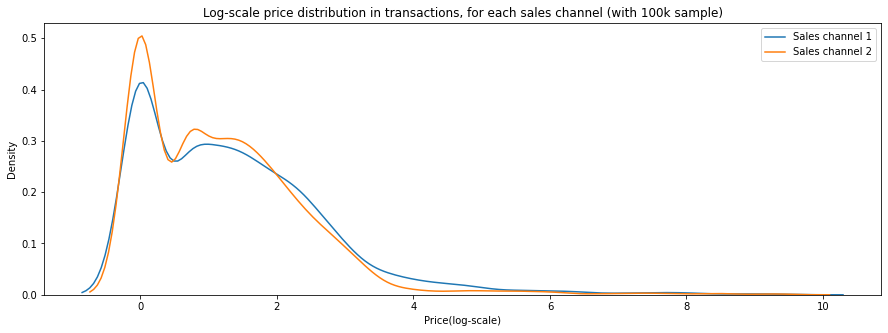

In [31]:
channel1_df = transactions[transactions['sales_channel_id'] == 1].sample(100_000)
channel2_df = transactions[transactions['sales_channel_id'] == 2].sample(100_000)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(np.log(channel1_df.price.value_counts()))
sns.kdeplot(np.log(channel2_df.price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 2'])
plt.xlabel('Price(log-scale)')
plt.title('Log-scale price distribution in transactions, for each sales channel (with 100k sample)')
plt.show()

- Channel에 따라 price가 달라지진 않는지 분포를 찍어보았다. 해당 데이터는 7:3의 비율을 가진 unbalanced 데이터이므로 각각 10만개씩 sampling하여 분포를 찍어보았다. 각 item마다 가격이 천차만별이라 log-scale로 바꿔주어 분포를 나타내었다. 여러 번 반복하여 sampling을 통해 분포를 나타내봐도 큰 차이가 없는 것으로 보아 온라인과 오프라인에서의 유의미한 가격차이는 없는 것 같다.
- ***따라서 추천 모델을 구성할 때 sales_channel을 사용하지 않을 예정이다.***

### 날짜별 분포

In [32]:
min(transactions['t_dat']), max(transactions['t_dat'])

('2018-09-20', '2020-09-22')

- 't_dat'은 판매가 이루어진 날짜를 기록한다. 2018년 9월 20일부터 2020년 9월 22일까지, 약 2년간 판매기록을 나타낸다.

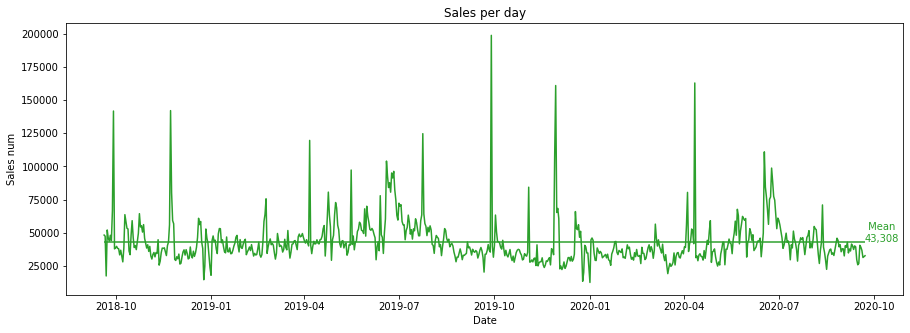

In [33]:
date_df = transactions.groupby(['t_dat'])['article_id'].count().reset_index()
date_df['t_dat'] = pd.to_datetime(date_df['t_dat'])

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
plt.plot('t_dat','article_id', data = date_df, color=sns.color_palette('tab10')[2])
plt.hlines(date_df.article_id.mean(), min(date_df.t_dat), max(date_df.t_dat), color = sns.color_palette('tab10')[2])
plt.text(max(date_df.t_dat), date_df.article_id.mean(), ' Mean\n'+format(round(date_df.article_id.mean()), ','),\
         color = sns.color_palette('tab10')[2])
plt.xlabel('Date')
plt.ylabel('Sales num')
plt.title('Sales per day')
plt.show()

- 위 그래프는 날짜별로 판매량을 집계한 그래프이다. 하루씩 엄청난 판매량을 기록하며 평균인 43,308을 훨씬 뛰어넘는 날들이 보인다. 계절별 판매량에 대해 눈에 띄는 차이는 잘 구분이 가지 않는다. 밑에서 항목별로 좀 더 자세히 알아보자

### 계절성

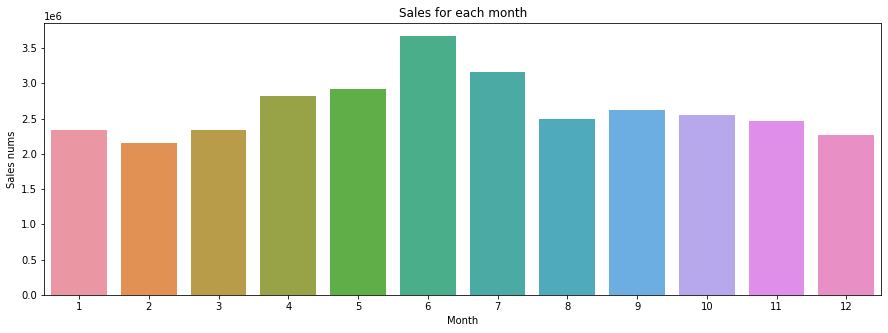

In [34]:
date_month = pd.to_datetime(transactions['t_dat']).dt.month.value_counts()
date_month_df = pd.DataFrame({'Month': date_month.index,
                   'Sales nums': date_month.values})

plt.figure(figsize = (15, 5))
plt.title('Sales for each month')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Month', y="Sales nums", data=date_month_df)
locs, labels = plt.xticks()
plt.show()

- 상기의 그래프는 월별로 판매량을 집계한 것이다. 6월을 비롯한 여름에 판매량이 가장 많고, 2월과 그 주변 겨울에 가장 판매량이 적다.

In [35]:
datetime_series = pd.to_datetime(transactions['t_dat'])
d = {'t_dat': datetime_series, 'year': datetime_series.dt.year, 'month': datetime_series.dt.month}
datetime_df = pd.DataFrame(data=d)
ts = pd.Series(datetime_df.groupby(['year', 'month']).count()[1:-1].values.T[0],\
               index = pd.date_range('2018-10', '2020-09', freq='BM'))

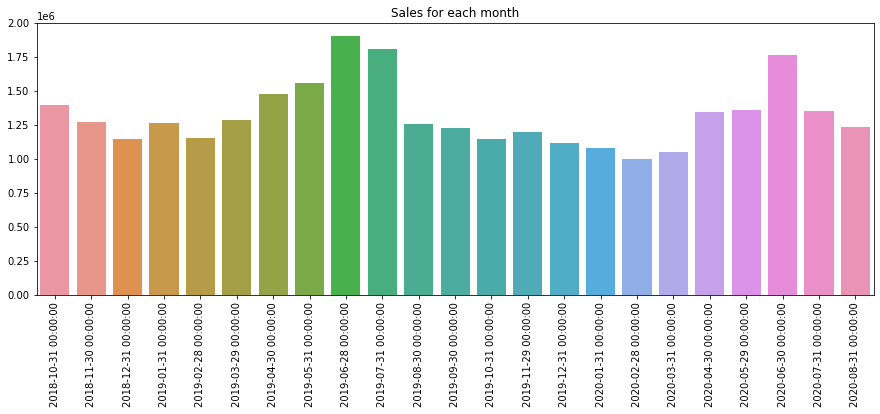

In [36]:
plt.figure(figsize = (15, 5))
plt.title('Sales for each month')
sns.set_color_codes("pastel")
s = sns.barplot(x = ts.index, y = ts.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

- 위 그래프는 판매량 데이터를 한달 간격으로 나타낸 것이다. 여름인 6 ~ 7월에 최고 판매량을, 겨울인 12 ~ 1월에 최저 판매량을 기록하며 월별로 변화하는 판매량을 관찰할 수 있다.
- ***위와 같은 월별 판매량의 변화를 통해 달별로 판매 편차가 어느 정도 있는 것을 알 수 있으므로, 추천 후보군을 구성할 때 월별 차이를 고려해야 한다.***

### Peak day

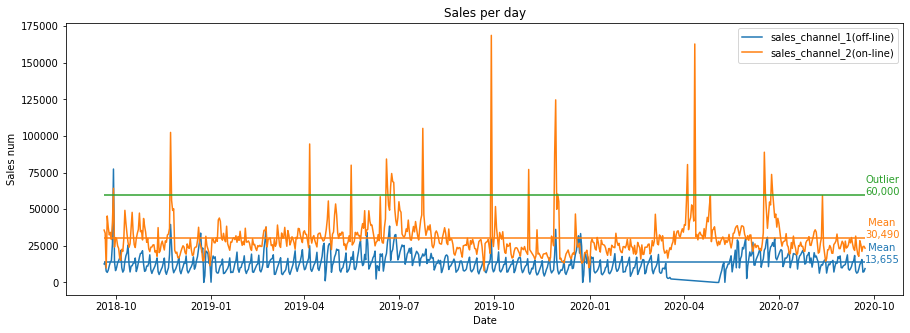

In [38]:
date_channel_df = transactions.groupby(['t_dat', 'sales_channel_id'])['article_id'].count().reset_index()
date_channel_df['t_dat'] = pd.to_datetime(date_channel_df['t_dat'])

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
channel_1_df = date_channel_df.loc[date_channel_df['sales_channel_id'] == 1]
g1 = ax.plot(channel_1_df.t_dat, channel_1_df.article_id, label = 'sales_channel_1(off-line)')
plt.hlines(channel_1_df.article_id.mean(), min(channel_1_df.t_dat), max(channel_1_df.t_dat))
plt.text(max(channel_1_df.t_dat), channel_1_df.article_id.mean(),\
         ' Mean\n'+format(round(channel_1_df.article_id.mean()), ','), color = sns.color_palette('tab10')[0])

channel_2_df = date_channel_df.loc[date_channel_df['sales_channel_id'] == 2]
g2 = ax.plot(channel_2_df.t_dat, channel_2_df.article_id, label = 'sales_channel_2(on-line)')
plt.hlines(channel_2_df.article_id.mean(), min(channel_2_df.t_dat),\
           max(channel_2_df.t_dat), color = sns.color_palette('tab10')[1])
plt.text(max(channel_2_df.t_dat), channel_2_df.article_id.mean(),\
         ' Mean\n'+format(round(channel_2_df.article_id.mean()), ','), color = sns.color_palette('tab10')[1])

plt.hlines(60000, min(channel_1_df.t_dat), max(channel_1_df.t_dat), color = sns.color_palette('tab10')[2])
plt.text(max(channel_2_df.t_dat), 60000, 'Outlier\n60,000', color = sns.color_palette('tab10')[2])

ax.legend()
plt.xlabel('Date')
plt.ylabel('Sales num')
plt.title('Sales per day')
plt.show()

- 상기의 그래프는 일별 판매량을 sales_channel에 따라 분리하여 나타낸 그래프이다. 온라인 판매인 channel 2에서 오프라인 판매인 channel 1보다 평균적으로 2배 이상 많은 판매가 이루어진다.(위에서 봤던 것처럼 판매량이 7:3 정도이므로 약 7/3=2.3배) 위의 그래프를 통해 유독 판매량이 높은 날은 대부분 온라인 판매인 sales_channel_2에서의 판매임을 알 수 있다. 이렇게 판매량이 유독 높은 날에 대해서 분석을 해보려하는데, channel2의 평균 판매량인 약 30,000의 2배인 판매량이 60,000이상인 날에 대해 분석을 진행할 것이다.
- 추가로, 2020년 4월 경 부근에 channel 1 데이터의 분포가 조금 이상한 것을 눈치챌 수 있는데, H&M의 질의응답에 따르면 당시 COVID-19으로 인해 오프라인 매장이 강제휴무에 들어가서 그렇다고 한다.

In [39]:
event_day_list = channel_2_df[channel_2_df['article_id'] > 60000]['t_dat'].\
                 reset_index(drop=True).dt.strftime('%Y-%m-%d').tolist()

In [40]:
channel_2_transaction_df = transactions[transactions['sales_channel_id'] == 2]
channel_2_transaction_pdtype = pd.merge(channel_2_transaction_df, articles[['article_id', 'product_type_name']],\
                                        left_on = 'article_id', right_on = 'article_id', how='left')
pdtype_sales = channel_2_transaction_pdtype['product_type_name'].value_counts().reset_index()
pdtype_sales = pd.concat([pdtype_sales, pdtype_sales['product_type_name']/transactions['t_dat'].nunique()], axis=1)
pdtype_sales.columns = ['Product type', 'Sales count', 'Average sales per day']

In [41]:
each_date_sales_list = []
for day in event_day_list:
    channel_2_date_df = channel_2_transaction_df[channel_2_transaction_df['t_dat'] == day]
    channel_2_date_merged_df = pd.merge(channel_2_date_df, articles, left_on = 'article_id', \
                                          right_on = 'article_id', how='left')
    ch2_date_value = channel_2_date_merged_df['product_type_name'].value_counts().reset_index()
    sales_percentage = pd.Series(ch2_date_value['product_type_name']/channel_2_date_df.shape[0]*100,\
                             name = 'Sales_percent(%)').map(lambda x: round(x, 2))
    ch2_date_value = pd.concat([ch2_date_value, sales_percentage], axis = 1)
    ch2_date_value = pd.merge(ch2_date_value, pdtype_sales[['Product type', 'Average sales per day']],\
                              left_on = 'index', right_on = 'Product type', how='left')
    ch2_date_value = ch2_date_value.drop(columns = 'Product type', axis = 1)
    ch2_date_value['Average sales per day'] = ch2_date_value['product_type_name']/ch2_date_value['Average sales per day']
    level_zero_column = day + '(Sales: '+ str(format(channel_2_date_df.shape[0], ',')) + ')'
    ch2_date_value.columns = [[level_zero_column, level_zero_column, level_zero_column, level_zero_column], \
                              ['Product_type', 'Sales_num', 'Sales_percent(%)', 'Sales_ratio_to_average']]
    each_date_sales_list.append(ch2_date_value)

In [42]:
integrated_peak_sales_df = each_date_sales_list[0]
for df in each_date_sales_list[1:]:
    integrated_peak_sales_df = pd.concat([integrated_peak_sales_df, df], axis = 1)

In [43]:
integrated_peak_sales_df.head(10)

2018-09-29(Sales: 64,272)                                                    \
               Product_type Sales_num Sales_percent(%) Sales_ratio_to_average   
0                   Sweater   11567.0            18.00               4.730431   
1                  Trousers   10359.0            16.12               2.372284   
2                     Dress    4383.0             6.82               1.235617   
3                   T-shirt    3948.0             6.14               2.086745   
4                    Blouse    3035.0             4.72               2.130678   
5                       Top    2590.0             4.03               1.737959   
6                  Vest top    2064.0             3.21               1.465272   
7                       Bra    2040.0             3.17               1.633986   
8                     Skirt    1987.0             3.09               1.940641   
9                    Jacket    1683.0             2.62               2.671400   

  2018-11-23(Sales: 102,429)                             \
                Product_type Sales_num Sales_percent(%)   
0                    Sweater   19393.0            18.93   
1                   Trousers   16054.0            15.67   
2                      Dress    7787.0             7.60   
3                     Blouse    4414.0             4.31   
4                        Top    4321.0             4.22   
5                    T-shirt    4277.0             4.18   
6                        Bra    4141.0             4.04   
7                   Vest top    3419.0             3.34   
8           Underwear bottom    3117.0             3.04   
9                     Jacket    2871.0             2.80   

                         2019-04-06(Sales: 94,537)                             \
  Sales_ratio_to_average              Product_type Sales_num Sales_percent(%)   
0               7.930946                  Trousers   12801.0            13.54   
1               3.676480                     Dress   10093.0            10.68   
2               2.195243                   T-shirt    7412.0             7.84   
3               3.098785                    Blouse    5275.0             5.58   
4               2.899507           Swimwear bottom    5158.0             5.46   
5               2.260641                Bikini top    5147.0             5.44   
6               3.316831                       Top    4969.0             5.26   
7               2.427213                  Vest top    4372.0             4.62   
8               3.649662                       Bra    3694.0             3.91   
9               4.557094                    Shorts    3299.0             3.49   

                         2019-05-16(Sales: 80,071)                             \
  Sales_ratio_to_average              Product_type Sales_num Sales_percent(%)   
0               2.931520                     Dress   10956.0            13.68   
1               2.845331                  Trousers    9234.0            11.53   
2               3.917669                   T-shirt    5322.0             6.65   
3               3.703238           Swimwear bottom    5319.0             6.64   
4               4.065988                  Vest top    5282.0             6.60   
5               3.972135                    Shorts    5247.0             6.55   
6               3.334332                Bikini top    5227.0             6.53   
7               3.103765                    Blouse    4313.0             5.39   
8               2.958796                       Top    3688.0             4.61   
9               2.998114                     Skirt    2780.0             3.47   

                         2019-06-19(Sales: 84,266)                             \
  Sales_ratio_to_average              Product_type Sales_num Sales_percent(%)   
0               3.088620                     Dress   12188.0            14.46   
1               2.114651                  Trousers    9843.0            11.68   
2               2.812984                    Blouse

- 위의 표는 channel 2에서 일별 평균 판매량인 약 30,000회의 2배인 60,000회 이상의 판매량을 기록한 'peak' 날짜들에 대해, 상품의 유형을 나타내는 ```product_type```별로 판매량(```Sales_num```) 기준 내림차순하여 나타내었다. 즉, 판매량이 급증한 날에 고객들이 어떤 상품을 주로 구매했는지를 나타낸 것이다. 가장 위에 peak 날짜가 적혀있고, 각 날짜별로 4개의 column이 존재한다. 상품유형을 나타내는 <code>Product_type</code>, 실제 판매량인 <code>Sales_num</code>, 전체 판매량에서 차지하는 비율을 나타내는 <code>Sales_percent(%)</code>, 상품유형별 일별 평균 판매량에 비해 해당 날짜에 몇 배의 판매량을 기록했는지를 보여주는 <code>Sales_ratio_to_average</code>(E.g.) Sweater가 해당 column에서 4의 값을 기록한다면 일일 평균 sweater 판매량 대비 해당 날짜에 4배 정도 판매했다는 의미이다) 등이 그것이다.
- 판매량이 60,000회를 넘은 날의 수는 총 22회이다. 4월: 3회, 5월: 1회, 6월: 10회, 7월 1회, 9월: 2회, 11월: 4회, 12월 1회로, 6월에 확연히 많은 peak날짜(판매 횟수가 60,000회가 넘은 날)가 있다는 것을 알 수 있다. 각 peak날짜의 4번째 column인 일 평균 판매량 대비 peak날짜 판매량 비율(```Sales_ratio_to_average```)을 살펴보면, 특정 날짜에 발생한 event에 의해 판매량이 그날 유독 많이 발생한 것인지 아니면 원래 판매량이 상위권인 제품인지 확인할 수 있다. 위의 table은 판매량을 기준으로 내림차순하였는데 대체로 상위권에서 해당 비율이 높은 것을 확인할 수 있다. 즉, 해당 날짜에 발생한 event(재고정리, 계절별 할인 등)에 의해 특정 품목들이 평소보다 많이 판매되어, 일일 평균 판매량에 비해 많은 구매가 이루어져 peak날짜로 기록되었다고 추정할 수 있다.
    - 해당 데이터가 어느 나라의 것인지는 밝히고 있지 않아 관련이 없을 수 있겠지만(나라별로 월별 기후는 다르므로), 한국 H&M 매장에선 6월말부터 season off 할인을 하는 것을 확인했다.
- ***결국 위의 표를 통해 알게 된 것은 판매량이 급증한 날엔 특정 유형의 상품들이 평소보다 매우 많이 팔려서였음을 알 수 있었고, 이는 해당 상품들에 해당되는 특별한 event(아마도 할인) 때문임을 유추해볼 수 있다. 그리고 그게 6월에 유독 몰려있음을 확인할 수 있었는데, 우리가 예측할 test 데이터의 기간은 9월 말에 해당하므로 위의 자료를 유용하게 사용하긴 힘들어보인다.(만약 판매량이 급증한 날들이 9월에 주로 몰려있었다면 9월에 많이 팔리는 품목들에 가중치를 많이 주는 방식으로 추천에 반영할 수 있었을 것이다)***